In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Arial'

import warnings
warnings.filterwarnings("ignore")

In [5]:
def get_group_figure_rev5(
        dataset: pd.DataFrame,
        order: list,
        feature_order: list,
        palette='Pastel1', figsize=(2.1, 2.1), top_alpha=1.1, is_save_file=False, dpi=600, x_label_rotation='45', ha='ha',
        save_name='a',
        yticks_range = False,
        relative_to_control=False,
        ylim_range = False
    ):

    plt.figure(figsize=figsize)

    # relative_to_control 옵션이 켜져 있으면 Control 그룹의 평균으로 나눔
    if relative_to_control:
        dataset = dataset.copy()
        for feat in feature_order:
            control_mean = dataset.loc[dataset['Label'] == 'Control', feat].mean()
            dataset[feat] = dataset[feat] / control_mean


    for i, feat in enumerate(feature_order):
        plt.subplot(1, 1, i + 1)
  
        sns.stripplot(data=dataset, x='Label', y=feat, order=order, jitter=True, palette=palette, edgecolor="gray", linewidth=1)      
        sns.boxplot(data=dataset, x='Label', y=feat, order=order, palette=palette, showfliers=False)           

        plt.xlabel('')
        plt.ylabel('')
        plt.yticks(fontsize=9)
        plt.title(f'{feat}', fontdict={'fontsize': 9})
        plt.xticks(fontsize=9)
        bottom, top = plt.ylim()
        plt.ylim(bottom * 0.9, top * top_alpha)

        if yticks_range:
            plt.yticks(yticks_range, fontsize=8)

        if ylim_range:
            plt.ylim(ylim_range)


    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1.1)

    plt.tight_layout()
    if is_save_file:
        plt.savefig(f'figure_{save_name}.png', dpi=dpi)
        print('figure.png file is saved')

    plt.show()

In [28]:
df = pd.read_excel('./data/Metabolomics_dataset.xlsx', sheet_name='Total_dataset')
df_list = pd.read_excel('./data/Metabolomics_dataset.xlsx', sheet_name='ID_NOTE')
list_dipeptide = df_list[df_list['Note'] == 'di-pep']['Label (RT_m/z)']
list_dipeptide_name = list(df_list[df_list['Note'] == 'di-pep']['Putative metabolites'])

len(list_dipeptide)

20

In [29]:
metadata_cols = ['Name', 'Enterotype', 'Label']
feature_cols = [col for col in df.columns if col not in metadata_cols]

# Calculate mean intensity for each feature in 'Control' group
control_means = df[df['Label'] == 'Control'][feature_cols].mean()

# Calculate relative intensity: each value divided by the corresponding control mean
df_relative = df.copy()
df_relative[feature_cols] = df[feature_cols].div(control_means)
df_key_T = df_relative.copy()

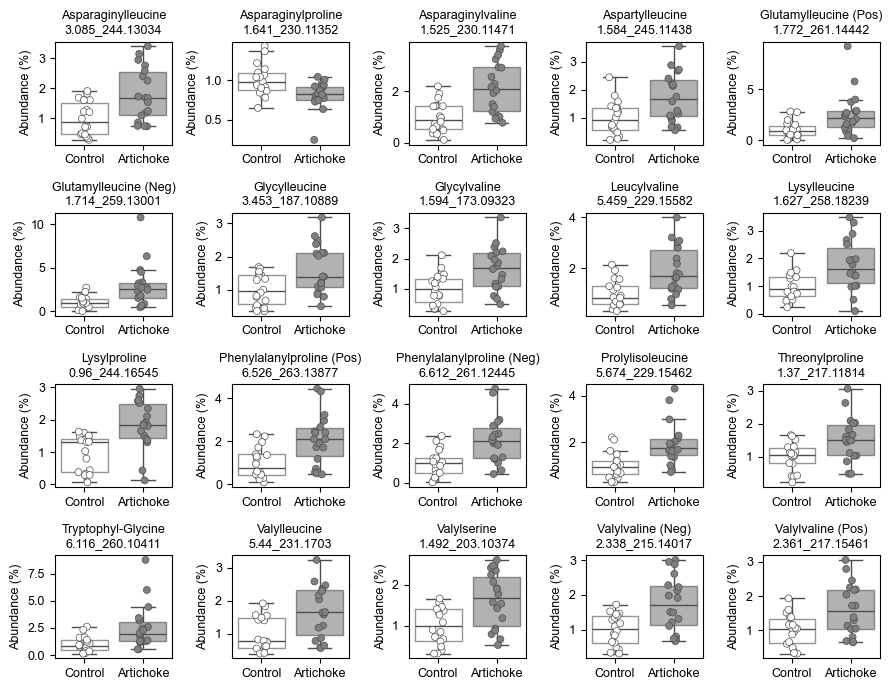

In [34]:
# B-type specific genus 
# Figure S3

feats = list_dipeptide

orders = ['Control', 'Artichoke']
g_colors = [ 'white', 'gray',]
data = df_key_T

fig, axes = plt.subplots(4, 5, figsize=(9, 7))
axes = axes.flatten()

for i, feat in enumerate(feats):
    ax = axes[i]
    sns.stripplot(
        data=data, x='Label', y=feat,
        jitter=True, edgecolor='gray', linewidth=0.5,
        palette=g_colors, order=orders, ax=ax
    )
    sns.boxplot(
        data=data, x='Label', y=feat,
        order=orders, palette=g_colors,
        showfliers=False, ax=ax
    )
    for patch in ax.patches:
        patch.set_alpha(0.6)
    
    ax.set_title(f"{list_dipeptide_name[i]}\n{feat}", fontsize=9, )
    ax.set_xlabel('',)
    ax.set_ylabel('Abundance (%)', fontsize=9)
    ax.tick_params(axis='x', labelrotation=0, labelsize=9)
    ax.tick_params(axis='y', labelsize=9)
    # ax.set_ylim(-4, 15)



plt.tight_layout()
plt.savefig('./dipeptide.png', dpi=600)
plt.show()


In [ ]:
# ['0.997_87.00876', '0.953_145.06192', '0.941_146.04592', '0.965_148.06044', '0.966_101.02443', '0.96_104.07048', '1.44_117.01937', '0.953_89.02442']

In [40]:
orders = ['Control', 'Artichoke']
g_colors = [ 'white', 'gray']

figure.png file is saved


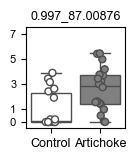

In [41]:
get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 7.5], yticks_range=[0, 1, 3, 5, 7],
                         is_save_file=True, save_name=df_list_name[0], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[0]],  relative_to_control=True)

figure.png file is saved


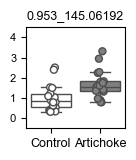

In [26]:
num = 1

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 4.5], yticks_range=[0, 1,2, 3, 4],
                         is_save_file=True, save_name=df_list_name[num], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[num]],  relative_to_control=True)

figure.png file is saved


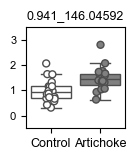

In [28]:
num = 2

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 3.5], yticks_range=[0, 1,2, 3, 4],
                         is_save_file=True, save_name=df_list_name[num], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[num]],  relative_to_control=True)

figure.png file is saved


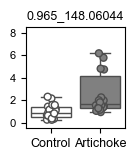

In [31]:
num = 3

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 8.5], yticks_range=[0, 2, 4, 6, 8],
                         is_save_file=True, save_name=df_list_name[num], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[num]],  relative_to_control=True)

figure.png file is saved


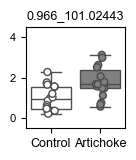

In [34]:
num = 4

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 4.5], yticks_range=[0, 2, 4],
                         is_save_file=True, save_name=df_list_name[num], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[num]],  relative_to_control=True)

figure.png file is saved


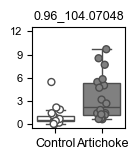

In [40]:
num = 5

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 12.5], yticks_range=[0, 3, 6, 9, 12],
                         is_save_file=True, save_name=df_list_name[num], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[num]],  relative_to_control=True)

figure.png file is saved


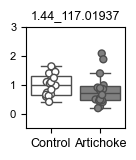

In [49]:
num = 6

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 3], yticks_range=[0, 1, 2, 3],
                         is_save_file=True, save_name=df_list_name[num], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[num]],  relative_to_control=True)

figure.png file is saved


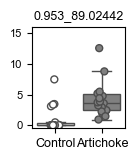

In [ ]:
# lactic acid

# 0.668430514, 2.25595105
# 0.953_89.02442, Lactate

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 16], yticks_range=[0, 5, 10, 15],
                         is_save_file=True, save_name='lactate', ha='right', figsize=(1.45, 1.7), feature_order=['0.953_89.02442'],  relative_to_control=True)

In [71]:
# B-type
g_colors = [ 'firebrick', 'lightcoral',]

In [72]:
df = pd.read_csv('./data/intensity.csv')

metadata_cols = ['Name', 'Enterotype', 'Label']
feature_cols = [col for col in df.columns if col not in metadata_cols]

# Calculate mean intensity for each feature in 'Control' group
control_means = df[df['Label'] == 'Control'][feature_cols].mean()

# Calculate relative intensity: each value divided by the corresponding control mean
df_relative = df.copy()
df_relative[feature_cols] = df[feature_cols].div(control_means)

df_relative = df_relative[df_relative['Enterotype'] == 'B-type']
df_key_T = df_relative.copy()

figure.png file is saved


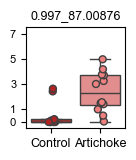

In [73]:
get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 7.5], yticks_range=[0, 1, 3, 5, 7],
                         is_save_file=True, save_name=df_list_name[0], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[0]],  relative_to_control=False)

figure.png file is saved


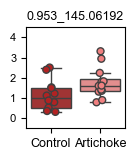

In [74]:
num = 1

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 4.5], yticks_range=[0, 1,2, 3, 4],
                         is_save_file=True, save_name=df_list_name[num], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[num]],  relative_to_control=False)

figure.png file is saved


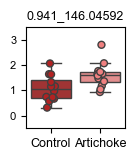

In [75]:
num = 2

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 3.5], yticks_range=[0, 1,2, 3, 4],
                         is_save_file=True, save_name=df_list_name[num], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[num]],  relative_to_control=False)

figure.png file is saved


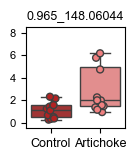

In [76]:
num = 3

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 8.5], yticks_range=[0, 2, 4, 6, 8],
                         is_save_file=True, save_name=df_list_name[num], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[num]],  relative_to_control=False)

figure.png file is saved


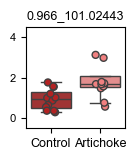

In [77]:
num = 4

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 4.5], yticks_range=[0, 2, 4],
                         is_save_file=True, save_name=df_list_name[num], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[num]],  relative_to_control=False)

figure.png file is saved


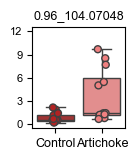

In [78]:
num = 5

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 12.5], yticks_range=[0, 3, 6, 9, 12],
                         is_save_file=True, save_name=df_list_name[num], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[num]],  relative_to_control=False)

figure.png file is saved


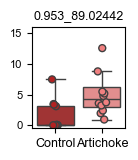

In [79]:
# lactic acid

# 0.668430514, 2.25595105
# 0.953_89.02442, Lactate

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 16], yticks_range=[0, 5, 10, 15],
                         is_save_file=True, save_name='lactate', ha='right', figsize=(1.45, 1.7), feature_order=['0.953_89.02442'],  relative_to_control=False)

In [83]:
# P-type
g_colors = [ 'dodgerblue', 'teal',]

In [84]:
df = pd.read_csv('./data/intensity.csv')

metadata_cols = ['Name', 'Enterotype', 'Label']
feature_cols = [col for col in df.columns if col not in metadata_cols]

# Calculate mean intensity for each feature in 'Control' group
control_means = df[df['Label'] == 'Control'][feature_cols].mean()

# Calculate relative intensity: each value divided by the corresponding control mean
df_relative = df.copy()
df_relative[feature_cols] = df[feature_cols].div(control_means)

df_relative = df_relative[df_relative['Enterotype'] == 'P-type']
df_key_T = df_relative.copy()

figure.png file is saved


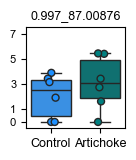

In [85]:
get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 7.5], yticks_range=[0, 1, 3, 5, 7],
                         is_save_file=True, save_name=df_list_name[0], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[0]],  relative_to_control=False)

figure.png file is saved


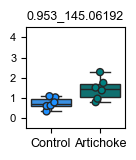

In [86]:
num = 1

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 4.5], yticks_range=[0, 1,2, 3, 4],
                         is_save_file=True, save_name=df_list_name[num], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[num]],  relative_to_control=False)

figure.png file is saved


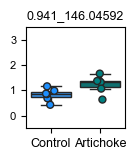

In [87]:
num = 2

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 3.5], yticks_range=[0, 1,2, 3, 4],
                         is_save_file=True, save_name=df_list_name[num], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[num]],  relative_to_control=False)

figure.png file is saved


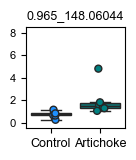

In [88]:
num = 3

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 8.5], yticks_range=[0, 2, 4, 6, 8],
                         is_save_file=True, save_name=df_list_name[num], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[num]],  relative_to_control=False)

figure.png file is saved


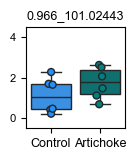

In [89]:
num = 4

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 4.5], yticks_range=[0, 2, 4],
                         is_save_file=True, save_name=df_list_name[num], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[num]],  relative_to_control=False)

figure.png file is saved


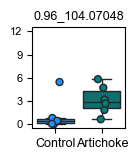

In [90]:
num = 5

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 12.5], yticks_range=[0, 3, 6, 9, 12],
                         is_save_file=True, save_name=df_list_name[num], ha='right', figsize=(1.45, 1.7), feature_order=[df_list[num]],  relative_to_control=False)

figure.png file is saved


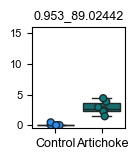

In [91]:
# lactic acid

# 0.668430514, 2.25595105
# 0.953_89.02442, Lactate

get_group_figure_rev5(df_key_T, order=orders, palette=g_colors, top_alpha=0.05, ylim_range=[-0.5, 16], yticks_range=[0, 5, 10, 15],
                         is_save_file=True, save_name='lactate', ha='right', figsize=(1.45, 1.7), feature_order=['0.953_89.02442'],  relative_to_control=False)